In [1]:
from pyqgraf import qgraf, model
from feynml.interface.qgraf import style
from feynmodel.interface.ufo import load_ufo_model
from feynmodel.interface.qgraf import feynmodel_to_qgraf
from xsdata.formats.dataclass.parsers import XmlParser
from pyfeyn2.feynmandiagram import FeynML
from feynamp.amplitude import square, multiply, feynman_diagram_to_string
import feynamp.amplitude as famp
import feynamp.vertex as fvert

import feynamp.form.momentum as m
from feynamp.form.color import apply_color, get_color
from feynamp.form.lorentz import apply_gammas, get_gammas
from feynamp.form.momentum import get_kinematics, get_onshell,get_mandelstamm_2_to_2, apply
import logging
logger = logging.getLogger("feynamp")
#logger.setLevel(logging.DEBUG)


	Please cite the following papers if you use this code:

      [1] Automatic Feynman graph generation J. Comput. Phys. 105 (1993) 279--289 https://doi.org/10.1006/jcph.1993.1074

      [2] Abusing Qgraf Nucl. Instrum. Methods Phys. Res. A 559 (2006) 220--223 https://doi.org/10.1016/j.nima.2005.11.151

      [3] Feynman graph generation and propagator mixing, I Comput. Phys. Commun. 269 (2021) 108103 https://doi.org/10.1016/j.cpc.2021.108103

	


In [2]:
fm = load_ufo_model("ufo_sm")
qfm = feynmodel_to_qgraf(fm, True, False)

In [3]:
qgraf.install("3.6.5")
xml_string = qgraf.run("g[p1], g[p2]", "g[p3], g[p4]",loops=0,loop_momentum="l",model = qfm, style=style)

In [4]:
parser = XmlParser()
fml = parser.from_string(xml_string, FeynML)

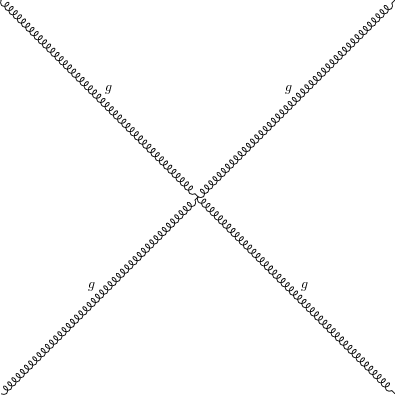

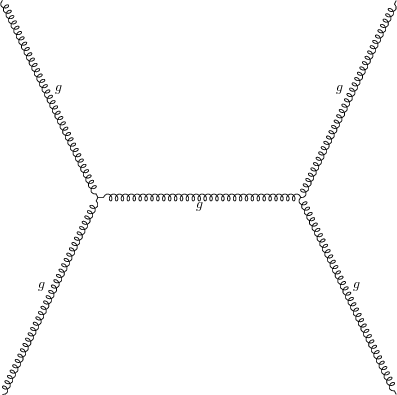

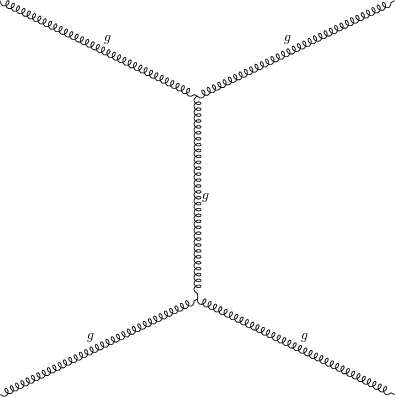

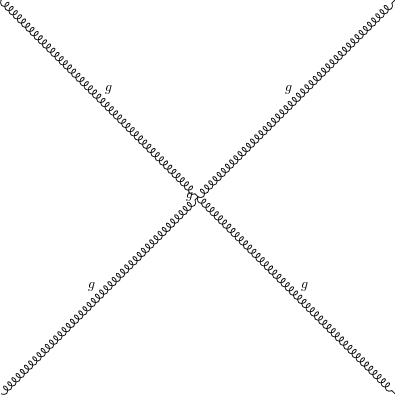

In [5]:
diagrams = fml.diagrams
#diagrams =[diagrams[0]]
for fd in diagrams:
    fd.render()

In [6]:
str(fd)

'FeynmanDiagram(id=\'Diagram4\', style=cssutils.css.CSSStyleDeclaration(cssText=\'\'), clazz=None, propagators=[Propagator(id=\'Prop1\', pdgid=21, name=\'g\', type=\'gluon\', particle=<Particle: name="g", pdgid=21, mass=0.0 MeV>, style=cssutils.css.CSSStyleDeclaration(cssText=\'\'), clazz=None, label=None, momentum=Momentum(name=\'-p1+p4\', px=None, py=None, pz=None, e=None), source=\'Vert2\', target=\'Vert1\')], vertices=[Vertex(id=\'Vert1\', style=cssutils.css.CSSStyleDeclaration(cssText=\'\'), clazz=None, x=None, y=None, z=None, label=None, shape=None), Vertex(id=\'Vert2\', style=cssutils.css.CSSStyleDeclaration(cssText=\'\'), clazz=None, x=None, y=None, z=None, label=None, shape=None)], legs=[Leg(id=\'In1\', pdgid=21, name=\'g\', type=\'gluon\', particle=<Particle: name="g", pdgid=21, mass=0.0 MeV>, style=cssutils.css.CSSStyleDeclaration(cssText=\'\'), clazz=None, label=None, momentum=Momentum(name=\'p1\', px=None, py=None, pz=None, e=None), target=\'Vert1\', x=None, y=None, z=None

In [7]:
import feynamp.vertex as fvert
import importlib
importlib.reload(fvert)
fvert.get_vertex_math(fd, fd.vertices[0],fm,typed=True)

[('-G',
  'f(GluInProp1,GluIn1,GluOut2)',
  'P(MuOut2,-Mom_p1+Mom_p4)*Metric(MuInProp1,MuIn1) - P(MuOut2,Mom_p1)*Metric(MuInProp1,MuIn1) - P(MuIn1,-Mom_p1+Mom_p4)*Metric(MuInProp1,MuOut2) + P(MuIn1,Mom_p4)*Metric(MuInProp1,MuOut2) + P(MuInProp1,Mom_p1)*Metric(MuIn1,MuOut2) - P(MuInProp1,Mom_p4)*Metric(MuIn1,MuOut2)')]

In [8]:
import feynamp.vertex as fvert
import importlib
importlib.reload(fvert)
cfd = fd.conjugated()
fvert.get_vertex_math(cfd, cfd.vertices[0],fm,typed=True)

[('-G',
  'f(GluOutPropagator16,GluLeg12,GluLeg15)',
  'P(MuLeg15,-Mom_p1+Mom_p4)*Metric(MuOutPropagator16,MuLeg12) - P(MuLeg15,Mom_p1)*Metric(MuOutPropagator16,MuLeg12) - P(MuLeg12,-Mom_p1+Mom_p4)*Metric(MuOutPropagator16,MuLeg15) + P(MuLeg12,Mom_p4)*Metric(MuOutPropagator16,MuLeg15) + P(MuOutPropagator16,Mom_p1)*Metric(MuLeg12,MuLeg15) - P(MuOutPropagator16,Mom_p4)*Metric(MuLeg12,MuLeg15)')]

In [9]:
for fd in diagrams:
    print(feynman_diagram_to_string(fd.conjugated(),fm))

((complex(0,1)*G**2)*(f(Glu25,GluLeg20,GluLeg22)*f(GluLeg21,GluLeg23,Glu25))*(Metric(MuLeg20,MuLeg22)*Metric(MuLeg21,MuLeg23) - Metric(MuLeg20,MuLeg21)*Metric(MuLeg22,MuLeg23)) + (complex(0,1)*G**2)*(f(Glu24,GluLeg20,GluLeg21)*f(GluLeg22,GluLeg23,Glu24))*(Metric(MuLeg20,MuLeg22)*Metric(MuLeg21,MuLeg23) - Metric(MuLeg20,MuLeg21)*Metric(MuLeg22,MuLeg23)) + (complex(0,1)*G**2)*(f(Glu26,GluLeg20,GluLeg23)*f(GluLeg21,GluLeg22,Glu26))*(Metric(MuLeg20,MuLeg22)*Metric(MuLeg21,MuLeg23) - Metric(MuLeg20,MuLeg21)*Metric(MuLeg22,MuLeg23))) * (VA(GluLeg20,Mom_p1)*eps_star(MuLeg20,PolLeg20,Mom_p1)) * (VA(GluLeg21,Mom_p2)*eps_star(MuLeg21,PolLeg21,Mom_p2)) * (VA(GluLeg22,Mom_p3)*eps(MuLeg22,PolLeg22,Mom_p3)) * (VA(GluLeg23,Mom_p4)*eps(MuLeg23,PolLeg23,Mom_p4))
((-G)*(f(GluOutPropagator36,GluLeg32,GluLeg33))*(P(MuLeg33,-Mom_p1-Mom_p2)*Metric(MuOutPropagator36,MuLeg32) - P(MuLeg33,Mom_p1)*Metric(MuOutPropagator36,MuLeg32) - P(MuLeg32,-Mom_p1-Mom_p2)*Metric(MuOutPropagator36,MuLeg33) + P(MuLeg32,Mom_p2)

In [10]:
s2 = square(diagrams,fm,tag=False)

In [11]:
s2

'(((complex(0,1)*G**2)*(f(Glu64,GluIn1,GluOut1)*f(GluIn2,GluOut2,Glu64))*(Metric(MuIn1,MuOut1)*Metric(MuIn2,MuOut2) - Metric(MuIn1,MuIn2)*Metric(MuOut1,MuOut2)) + (complex(0,1)*G**2)*(f(Glu63,GluIn1,GluIn2)*f(GluOut1,GluOut2,Glu63))*(Metric(MuIn1,MuOut1)*Metric(MuIn2,MuOut2) - Metric(MuIn1,MuIn2)*Metric(MuOut1,MuOut2)) + (complex(0,1)*G**2)*(f(Glu65,GluIn1,GluOut2)*f(GluIn2,GluOut1,Glu65))*(Metric(MuIn1,MuOut1)*Metric(MuIn2,MuOut2) - Metric(MuIn1,MuIn2)*Metric(MuOut1,MuOut2))) * (VA(GluIn1,Mom_p1)*eps(MuIn1,PolIn1,Mom_p1)) * (VA(GluIn2,Mom_p2)*eps(MuIn2,PolIn2,Mom_p2)) * (VA(GluOut1,Mom_p3)*eps_star(MuOut1,PolOut1,Mom_p3)) * (VA(GluOut2,Mom_p4)*eps_star(MuOut2,PolOut2,Mom_p4)))*(((complex(0,1)*G**2)*(f(Glu87,GluLeg82,GluLeg84)*f(GluLeg83,GluLeg85,Glu87))*(Metric(MuLeg82,MuLeg84)*Metric(MuLeg83,MuLeg85) - Metric(MuLeg82,MuLeg83)*Metric(MuLeg84,MuLeg85)) + (complex(0,1)*G**2)*(f(Glu86,GluLeg82,GluLeg83)*f(GluLeg84,GluLeg85,Glu86))*(Metric(MuLeg82,MuLeg84)*Metric(MuLeg83,MuLeg85) - Metric

In [12]:
fs = ""
fs += get_gammas()
fs += get_color()
fs += get_kinematics()
fs += get_onshell(fml.diagrams[0],fm)
fs += get_mandelstamm_2_to_2(fml.diagrams[0],fm,replace_u=True)
fs

'\n    id epsstar(Muc?,Polb?,Moma?) * eps(Mul?,Pold?,Moma?) = -Metric(Mul,Muc);\n    \n    once u(Spinc?,Momb?)*ubar(Spina?,Momb?) = Gamma(N1_?,Spinc,Spina) * P(N1_?,Momb) + GammaId(Spinc,Spina) * P(N1_?,Momb) * P(N1_?,Momb);\n    \n    once u(Spinc?,Momb?)*ubar(Spina?,Momb?) = Gamma(N2_?,Spinc,Spina) * P(N2_?,Momb) + GammaId(Spinc,Spina) * P(N2_?,Momb) * P(N2_?,Momb);\n    \n    once u(Spinc?,Momb?)*ubar(Spina?,Momb?) = Gamma(N3_?,Spinc,Spina) * P(N3_?,Momb) + GammaId(Spinc,Spina) * P(N3_?,Momb) * P(N3_?,Momb);\n    \n    once u(Spinc?,Momb?)*ubar(Spina?,Momb?) = Gamma(N4_?,Spinc,Spina) * P(N4_?,Momb) + GammaId(Spinc,Spina) * P(N4_?,Momb) * P(N4_?,Momb);\n    \n    once u(Spinc?,Momb?)*ubar(Spina?,Momb?) = Gamma(N5_?,Spinc,Spina) * P(N5_?,Momb) + GammaId(Spinc,Spina) * P(N5_?,Momb) * P(N5_?,Momb);\n    \n    once u(Spinc?,Momb?)*ubar(Spina?,Momb?) = Gamma(N6_?,Spinc,Spina) * P(N6_?,Momb) + GammaId(Spinc,Spina) * P(N6_?,Momb) * P(N6_?,Momb);\n    \n    once u(Spinc?,Momb?)*ubar(Spina?,

In [13]:
rs =apply(s2,fs)

In [14]:
rs

'132*G^4+144*G^4*Cf-432*G^4*Cf^2+96*G^4*Cf^3-132*G^4*Nc-180*G^4*Nc*Cf+96*G^4*Nc*Cf^2-1056*G^4*Nc*Cf^3+192*G^4*Nc*Cf^4-9/2*Den(Mom_p1.Mom_p1+2*Mom_p1.Mom_p2+Mom_p2.Mom_p2)*i_*G^4*mst-9*Den(Mom_p1.Mom_p1+2*Mom_p1.Mom_p2+Mom_p2.Mom_p2)*i_*G^4*mss-9*Den(Mom_p1.Mom_p1+2*Mom_p1.Mom_p2+Mom_p2.Mom_p2)*i_*G^4*Cf*mst-18*Den(Mom_p1.Mom_p1+2*Mom_p1.Mom_p2+Mom_p2.Mom_p2)*i_*G^4*Cf*mss+90*Den(Mom_p1.Mom_p1+2*Mom_p1.Mom_p2+Mom_p2.Mom_p2)*i_*G^4*Cf^2*mst+180*Den(Mom_p1.Mom_p1+2*Mom_p1.Mom_p2+Mom_p2.Mom_p2)*i_*G^4*Cf^2*mss-72*Den(Mom_p1.Mom_p1+2*Mom_p1.Mom_p2+Mom_p2.Mom_p2)*i_*G^4*Cf^3*mst-144*Den(Mom_p1.Mom_p1+2*Mom_p1.Mom_p2+Mom_p2.Mom_p2)*i_*G^4*Cf^3*mss+9/2*Den(Mom_p1.Mom_p1+2*Mom_p1.Mom_p2+Mom_p2.Mom_p2)*i_*G^4*Nc*mst+9*Den(Mom_p1.Mom_p1+2*Mom_p1.Mom_p2+Mom_p2.Mom_p2)*i_*G^4*Nc*mss+18*Den(Mom_p1.Mom_p1+2*Mom_p1.Mom_p2+Mom_p2.Mom_p2)*i_*G^4*Nc*Cf*mst+36*Den(Mom_p1.Mom_p1+2*Mom_p1.Mom_p2+Mom_p2.Mom_p2)*i_*G^4*Nc*Cf*mss-36*Den(Mom_p1.Mom_p1+2*Mom_p1.Mom_p2+Mom_p2.Mom_p2)*i_*G^4*Nc*Cf^2*mst-72*Den(Mom

In [15]:
rr =m.apply_den(rs, get_onshell(fd,fm) + get_mandelstamm_2_to_2(fd,fm,replace_u=True))

In [16]:
rr

'132*G^4+144*G^4*Cf-432*G^4*Cf^2+96*G^4*Cf^3-132*G^4*Nc-180*G^4*Nc*Cf+96*G^4*Nc*Cf^2-1056*G^4*Nc*Cf^3+192*G^4*Nc*Cf^4-9/2*1/(mss)*i_*G^4*mst-9*1/(mss)*i_*G^4*mss-9*1/(mss)*i_*G^4*Cf*mst-18*1/(mss)*i_*G^4*Cf*mss+90*1/(mss)*i_*G^4*Cf^2*mst+180*1/(mss)*i_*G^4*Cf^2*mss-72*1/(mss)*i_*G^4*Cf^3*mst-144*1/(mss)*i_*G^4*Cf^3*mss+9/2*1/(mss)*i_*G^4*Nc*mst+9*1/(mss)*i_*G^4*Nc*mss+18*1/(mss)*i_*G^4*Nc*Cf*mst+36*1/(mss)*i_*G^4*Nc*Cf*mss-36*1/(mss)*i_*G^4*Nc*Cf^2*mst-72*1/(mss)*i_*G^4*Nc*Cf^2*mss+216*1/(mss)*i_*G^4*Nc*Cf^3*mst+432*1/(mss)*i_*G^4*Nc*Cf^3*mss-144*1/(mss)*i_*G^4*Nc*Cf^4*mst-288*1/(mss)*i_*G^4*Nc*Cf^4*mss+100*1/(mss)^2*G^4*Cf^2*mst^2+100*1/(mss)^2*G^4*Cf^2*mss*mst+138*1/(mss)^2*G^4*Cf^2*mss^2+50*1/(mss)^2*G^4*Nc*Cf*mst^2+50*1/(mss)^2*G^4*Nc*Cf*mss*mst+69*1/(mss)^2*G^4*Nc*Cf*mss^2+200*1/(mss)^2*G^4*Nc*Cf^3*mst^2+200*1/(mss)^2*G^4*Nc*Cf^3*mss*mst+276*1/(mss)^2*G^4*Nc*Cf^3*mss^2-21/2*1/(mss)*1/(mst)*G^4*mst^2+6*1/(mss)*1/(mst)*G^4*mss*mst-51/2*1/(mss)*1/(mst)*G^4*mss^2-21/2*1/(mss)*1/(mst)*

In [29]:
import sympy
ret = sympy.simplify(
        sympy.parse_expr(
            rr
            .replace("^", "**")
            .replace("mss", "s")
            .replace("msu", "u")
            .replace("mst", "t")
        ).subs("Nc", "3").subs("Cf", "4/3") / 2 /2 /8 /8
    )
ret

G**4*(-33066*i_*s**5*t - 228015*i_*s**4*t**2 - 376911*i_*s**3*t**3 - 180963*i_*s**2*t**4 + 999*i_*s*t**5 + 1944*s**6 + 59534*s**5*t + 99345*s**4*t**2 + 139102*s**3*t**3 + 188875*s**2*t**4 + 138184*s*t**5 + 48600*t**6)/(6912*s**2*t**2*(s**2 + 2*s*t + t**2))

In [18]:
import equation_database as edb

In [28]:
from equation_database import isbn_9780511628788 as ref
ref.table_7_1_gg_gg.subs(ref.u, -ref.s-ref.t)

-9*s*t/(2*(-s - t)**2) - 9*s*(-s - t)/(2*t**2) + 27/2 - 9*t*(-s - t)/(2*s**2)